In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append("../")

### Import Desired Tires

In [3]:
all_tires = {
    "Hoosier_16x7.5-10_R20_7_cornering":{"long":None, "lat":None},
    "Hoosier_18x6.0-10_R20_7_cornering":{"long":None, "lat":None},
}

### Filter Data

In [4]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
tire_scaling = 2/3

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure))]
    except:
        print("Error getting lateral data for {0}".format(name))

### Calculate Peak FY

In [5]:
tires = []
FY_lst = []
FZ_lst = []

normal_loads = sorted(np.array(tire["lat"]["load"].unique()))

for name, tire in all_tires.items():
    FY_current = []
    FZ_current = []
    for load in normal_loads:
        
        temp = tire["lat"][tire["lat"]["load"] == load]
        FY_current.append(max(temp["FY"]))
        FZ_current.append(load)

        # print(peak_FY_SA)

        # plt.title(f"{load}")
        # plt.plot(temp["SA"], temp["FY"])
    
    FY_lst.append(FY_current)
    FZ_lst.append(FZ_current)
    tires.append(name[:23])

### Plot peak FY vs FZ

Text(0, 0.5, 'Percent Difference (%)')

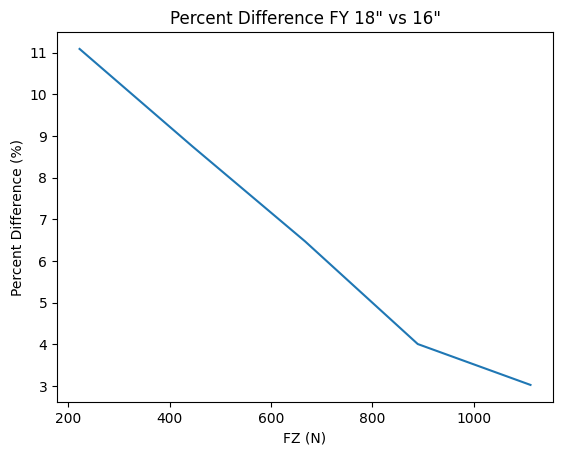

In [28]:
percent_diff = (np.array(FY_lst[1]) - np.array(FY_lst[0])) / np.array(FY_lst[1]) * 100
adjusted_FZ = -1 * np.array(FZ_lst[0])
plt.plot(adjusted_FZ, percent_diff)

plt.title('Percent Difference FY 18" vs 16"')
plt.xlabel("FZ (N)")
plt.ylabel("Percent Difference (%)")